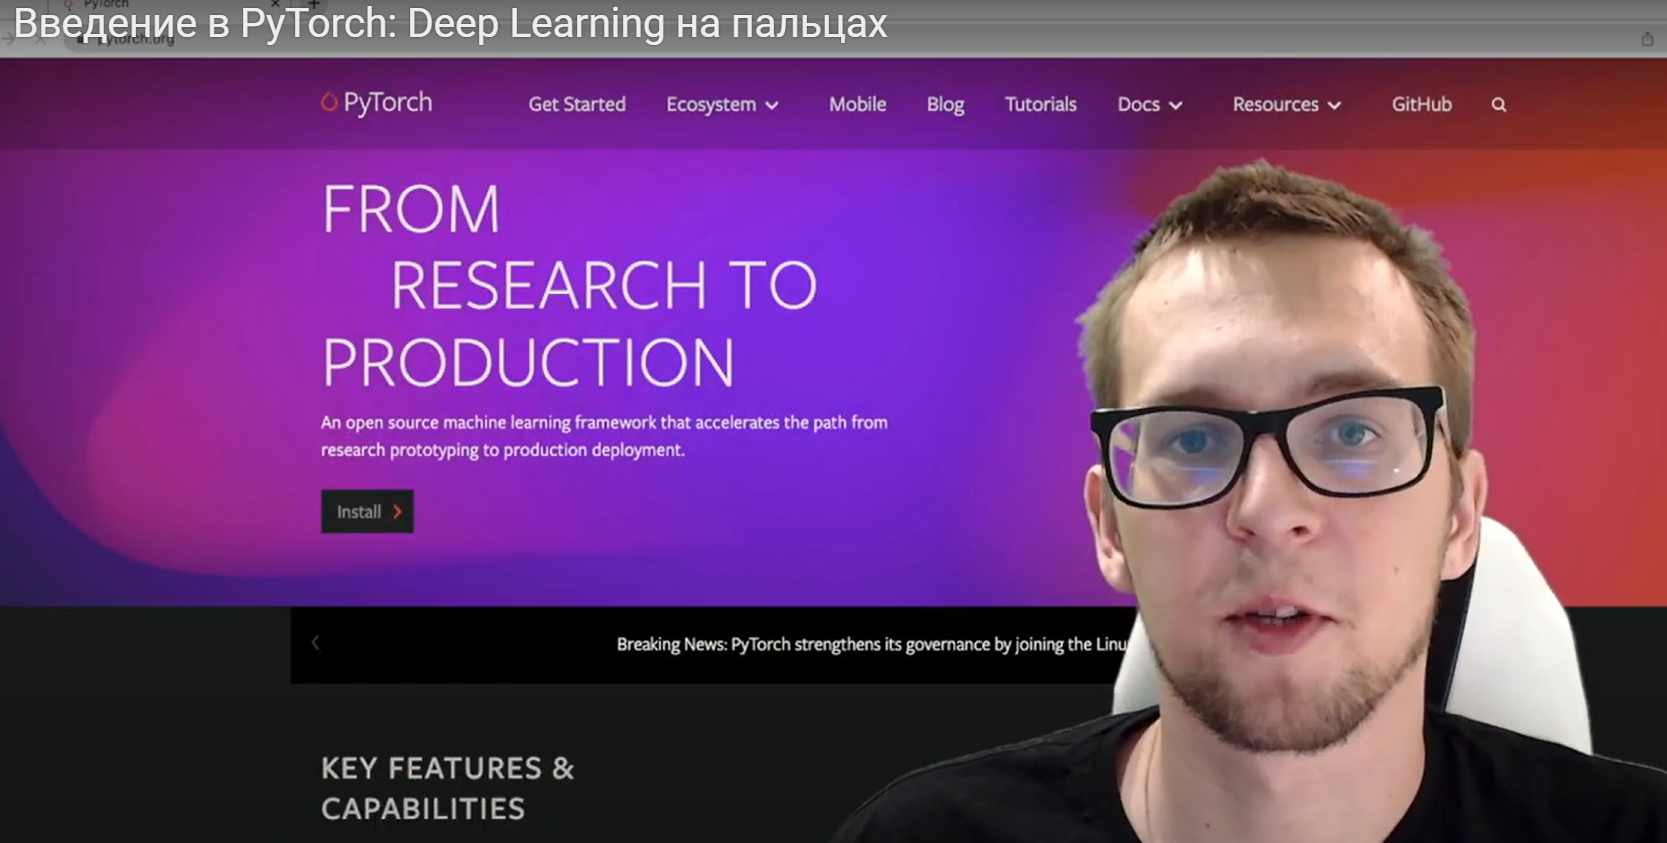

In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
warnings.filterwarnings('ignore', 'FutureWarning')
plt.style.use('dark_background')

In [3]:
arr = np.array([1, 2, 3])
arr_tensor = torch.from_numpy(arr)  # Copy will be not deep. If You change tensor, Your array will also changed
arr_tensor

tensor([1, 2, 3], dtype=torch.int32)

In [4]:
# RGB picture
picture = torch.rand(3, 255, 255)
picture

tensor([[[0.8546, 0.2252, 0.2483,  ..., 0.0441, 0.9144, 0.8227],
         [0.4629, 0.8859, 0.0414,  ..., 0.9418, 0.1939, 0.1974],
         [0.1845, 0.0202, 0.7461,  ..., 0.5325, 0.5302, 0.9105],
         ...,
         [0.0939, 0.3415, 0.6011,  ..., 0.8170, 0.6666, 0.7743],
         [0.5672, 0.8779, 0.7920,  ..., 0.6041, 0.7168, 0.5252],
         [0.2168, 0.9265, 0.4559,  ..., 0.0104, 0.3311, 0.8004]],

        [[0.1322, 0.3348, 0.4732,  ..., 0.1848, 0.9588, 0.8928],
         [0.8147, 0.1888, 0.2061,  ..., 0.1873, 0.0692, 0.2129],
         [0.2369, 0.3878, 0.0263,  ..., 0.8371, 0.1851, 0.4652],
         ...,
         [0.3779, 0.5918, 0.5157,  ..., 0.8962, 0.4063, 0.4107],
         [0.5313, 0.6367, 0.7260,  ..., 0.3105, 0.7271, 0.4046],
         [0.5660, 0.4919, 0.7050,  ..., 0.8862, 0.3304, 0.5355]],

        [[0.0629, 0.3957, 0.7606,  ..., 0.9132, 0.5686, 0.3683],
         [0.0270, 0.3674, 0.6430,  ..., 0.5810, 0.7364, 0.4367],
         [0.9916, 0.2378, 0.8633,  ..., 0.6607, 0.2075, 0.

In [5]:
# To NumPy from PyTorch
picture.numpy()

array([[[0.85464615, 0.22517222, 0.24833399, ..., 0.04407752,
         0.9144111 , 0.82268745],
        [0.46291214, 0.8859126 , 0.04142886, ..., 0.94175404,
         0.19392747, 0.19743007],
        [0.18449986, 0.0202443 , 0.7460767 , ..., 0.5325018 ,
         0.53020746, 0.9104594 ],
        ...,
        [0.0939011 , 0.3415221 , 0.60110825, ..., 0.8170458 ,
         0.6666238 , 0.7743194 ],
        [0.5671861 , 0.8778849 , 0.79200375, ..., 0.60414684,
         0.7167609 , 0.52517486],
        [0.21684706, 0.92647326, 0.4559399 , ..., 0.01039559,
         0.33105522, 0.80041933]],

       [[0.13219327, 0.3348469 , 0.47321528, ..., 0.18479246,
         0.95876163, 0.8928412 ],
        [0.8146598 , 0.18882316, 0.20611197, ..., 0.18727577,
         0.06924379, 0.21289551],
        [0.23691148, 0.38778645, 0.02631718, ..., 0.83711755,
         0.1851092 , 0.465223  ],
        ...,
        [0.37790126, 0.59184086, 0.5156626 , ..., 0.8962456 ,
         0.40633947, 0.41073287],
        [0.5

In [6]:
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader

### We split data in batch to make them train on different devices with different RAM

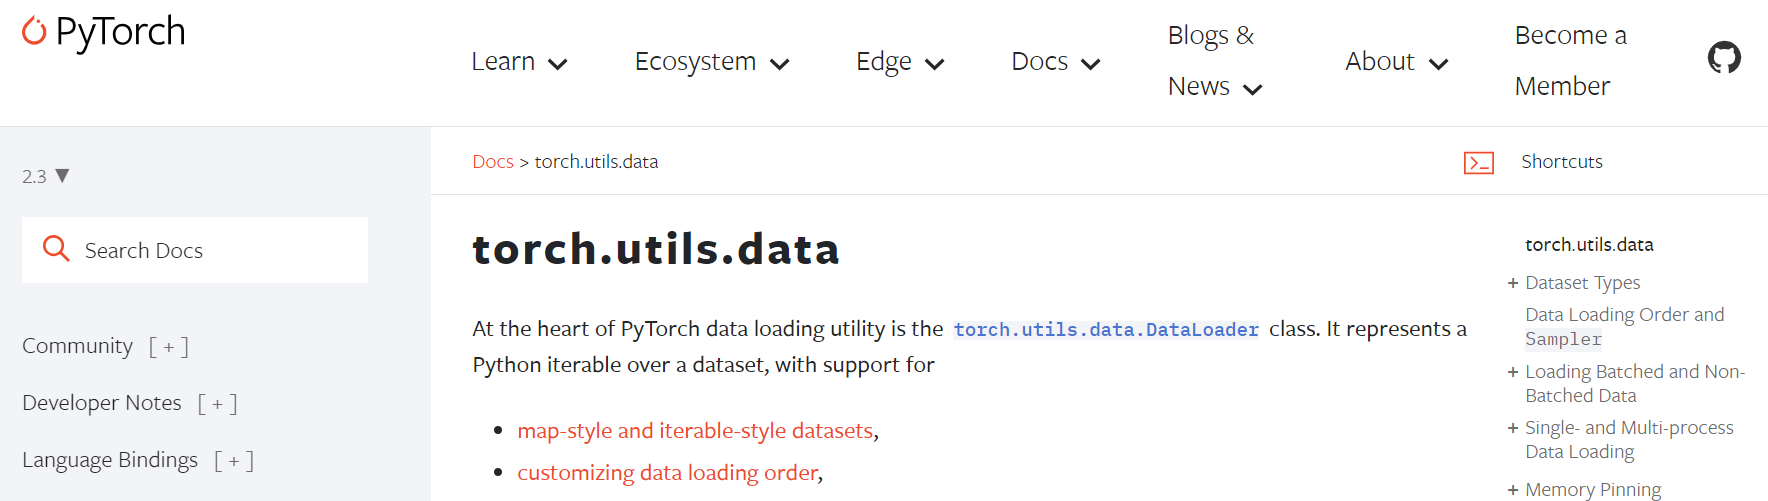

In [7]:
# Install torchmetrics library
!pip install -q torchmetrics

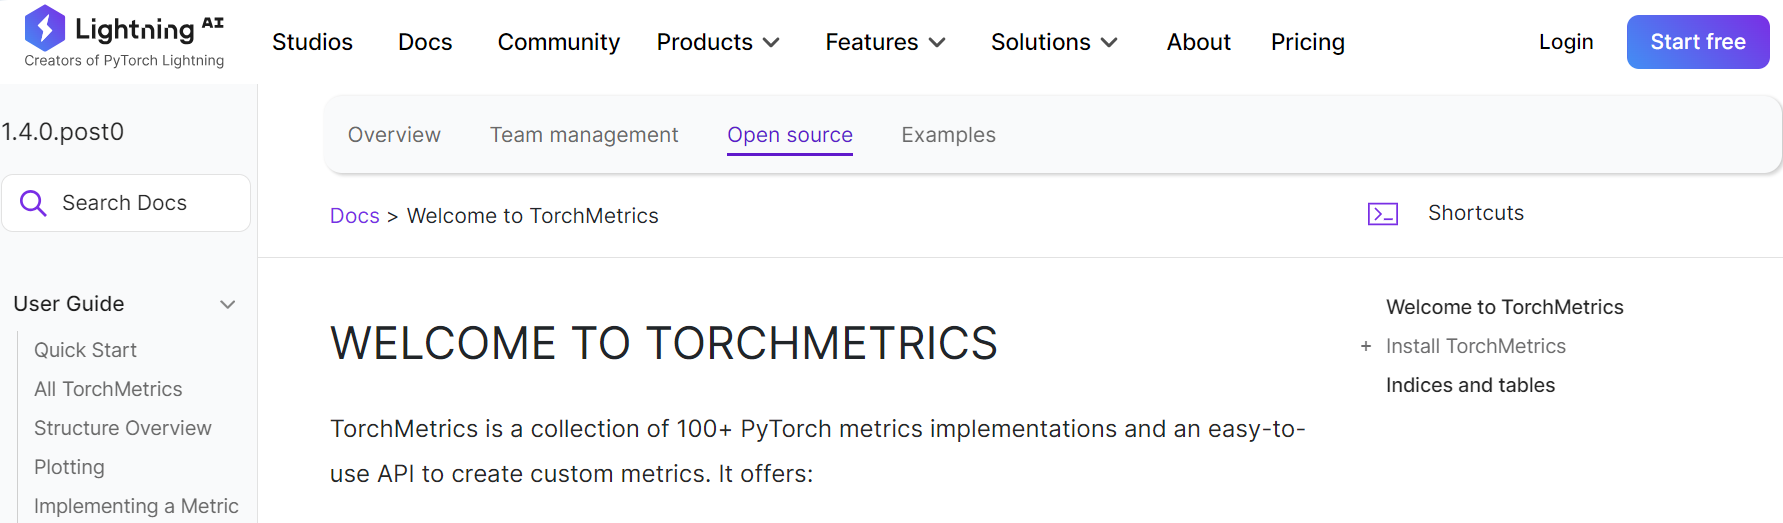

In [8]:
# Import metric and dataset from Scikit-Learn
from collections import Counter  # Hash-table
from tqdm.autonotebook import tqdm
from torchmetrics import Accuracy
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

C:\Users\ultra\AppData\Local\Temp\ipykernel_12116\2183120111.py:3: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


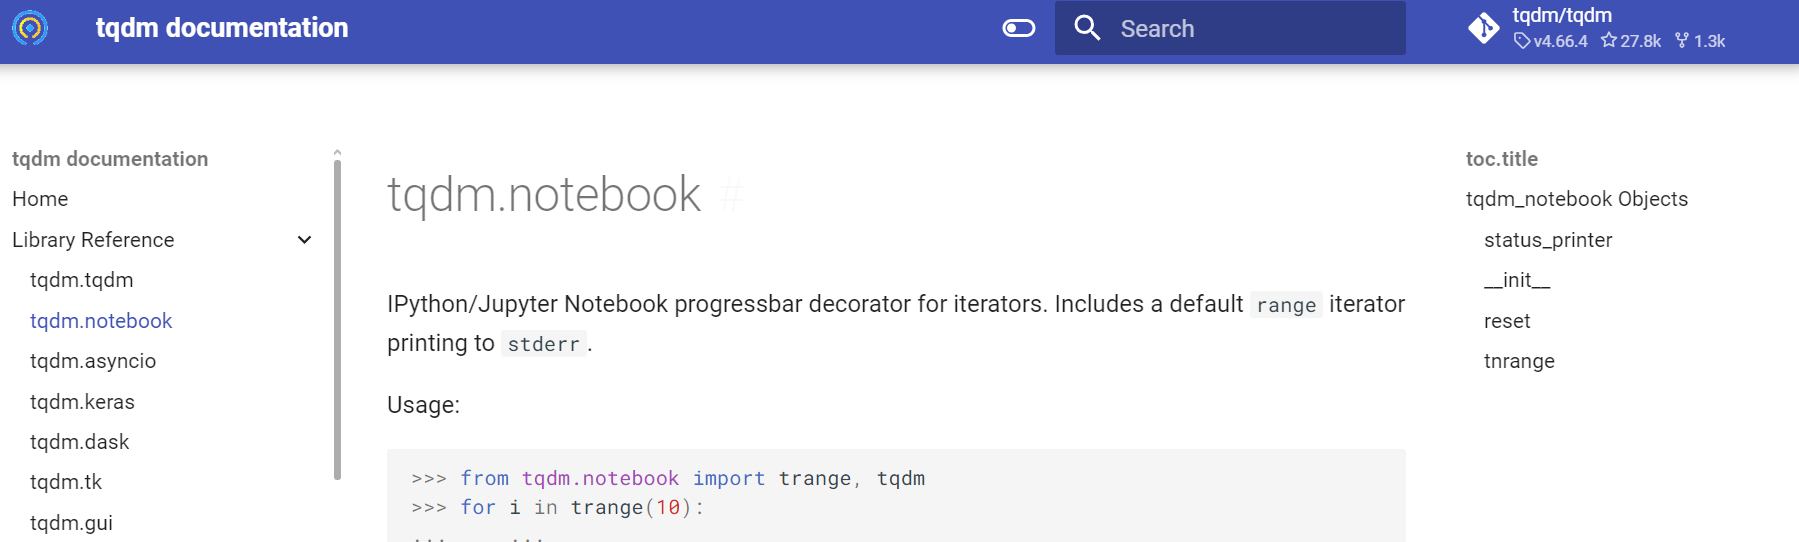

In [9]:
# Loads only 1000 observations
X, y = make_moons(n_samples=1_000, noise=.15, random_state=27)

In [10]:
Counter(y)

Counter({1: 500, 0: 500})

### Data above is balanced

In [11]:
type(X)

numpy.ndarray

In [12]:
X.shape

(1000, 2)

In [13]:
X

array([[ 1.13596773, -0.6292264 ],
       [ 1.12633671, -0.27421147],
       [ 1.11275797,  0.40235606],
       ...,
       [ 1.75849557, -0.29446948],
       [ 0.81042447, -0.2076096 ],
       [ 0.91685343,  0.24427831]])

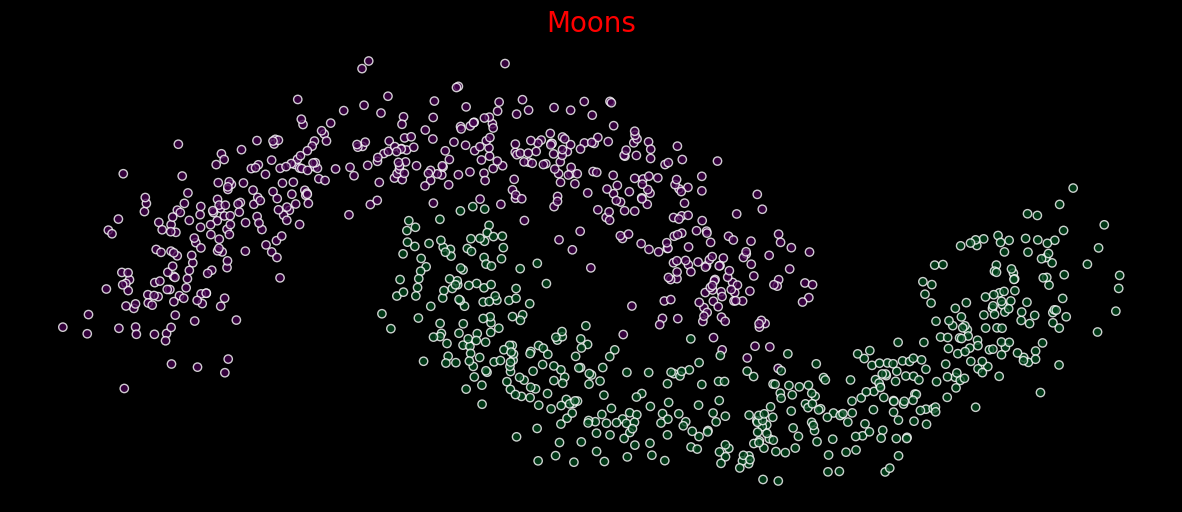

In [14]:
# Plot our data
plt.figure(figsize=(15, 6))
plt.title(label='Moons', fontsize=20, color='red')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='PRGn', alpha=0.8, ec='white')
plt.axis('off');

### Neural networks are able to detect non-linear dependencies in data

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=27)

In [16]:
X_train = torch.from_numpy(X_train).to(torch.float32)
X_val = torch.from_numpy(X_val).type_as(X_train)
y_train = torch.from_numpy(y_train).to(torch.float32)
y_val = torch.from_numpy(y_val).type_as(y_train)

In [17]:
X_train

tensor([[ 0.9094,  0.2338],
        [-0.2653,  0.6694],
        [ 0.6482,  0.8073],
        ...,
        [ 1.5584, -0.0550],
        [-0.2414,  0.6915],
        [ 0.4598,  0.5290]])